<img src= "./images/grad-desc-text.png" style = "width: 600px;">

<img src= "./images/muchmath.png" style = "width: 600px;">

## Objectives:

By the end of class students will be able to:
- summarize linear algebra in linear regression 
- define challenges of finding coefficient values
- describe how gradient decent and cost functions saves the day
 - define the *gradient* in gradient descent (hint, it's slope)
 - define the *descent* in gradient descent


## Main goal
Enough to conceptually _explain_ it, no expectation to _recode it from scratch_

## Process:
Will not use laptops until end of class. Going to start with discussion and lecture.</br>

Close them laptops!

![laptop](https://media0.giphy.com/media/3o7aCYTcHGVVlRmYuc/giphy.gif)

### Part 1: Linear Regression
### Remember, Linear albegra turns these equations:

$4x_1 + 2x_2 = 8$</br>

$5x_1 + 3x_2 = 9$

### into this:

$
\begin{bmatrix}4 & 2 \\ 5 & 3 \end{bmatrix}*\begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}
$ 

### In linear regression using linear algebra:

We're representing each **observation** as a **linear combination of features**.

So if we were using an Auto dataset to predict **mpg** from *cylinders, displacement, horsepower, weight, acceleration and year*, we see the data like this:


![data](./images/data.png)

And if we know we want to find a linear regression formula that looks like:

$ y_{pred} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{n}x_n $


### How does the computer represent the observations and betas in the form of linear algebra?

#### Exercise: write it out using what we have above


.. I'll wait.

## Challenge:

Okay, so how do we find the betas? How do we find the coefficients?

Let's start with a more simple example and come back to our mpg later.



We've learned previously that for regression we find the minimum sum of squares:

### Regression and Sum of Squares

#### Generating some data to make a mini-regression problem
#### This will be quick, it's more about the last graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]

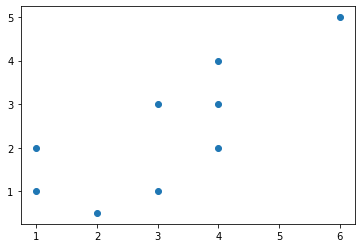

In [3]:
fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()


### Playing around with parameters to find the line of best fit
#### We know in theory how to find the best SINGLE coefficient - change it around and see what works!!!!

[funnt gif here]

<p style='text-align:center;font-size:20px'>$h_\theta(x) = \theta_0 + \theta_1 x $</p>

<p style='text-align:center;font-size:20px'>$ Y = \beta_0  + \beta_1 x $</p>

In [4]:
beta_0 = 0

In [5]:
beta_1 = [.25, .5, .75, .8, 1,]

In [6]:
# beta_1 = list(np.arange(0,3,0.05))

#### Trying different values of $b_1$ to see which works best

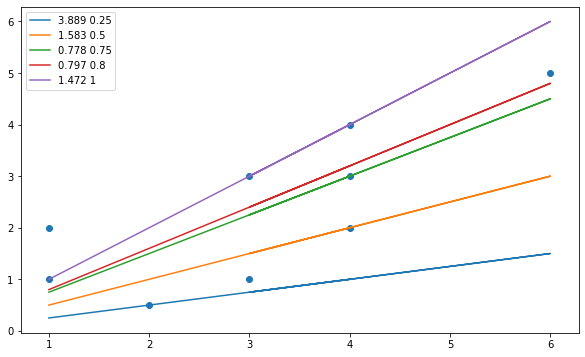

In [7]:
## Generating predictions and cost function values
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{mse} {t}')
    
ax.scatter(x,y)
plt.legend()
plt.show()

### Plot the Cost Curve

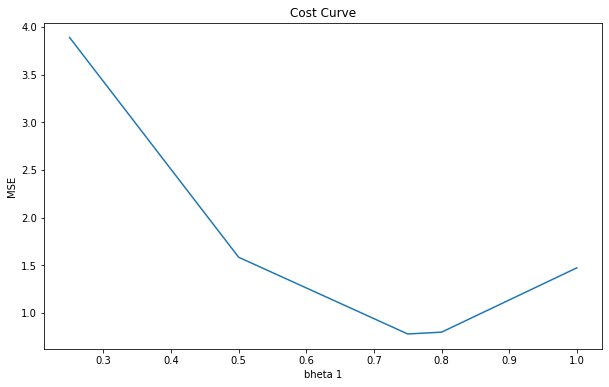

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('bheta 1')
ax.set_ylabel('MSE')
plt.show()

And we see that a $b_1$ around 7.5 works best.

**QUICK CHECK**:  What do I mean by "Best"??? </br>

## Challenge
**AND**:  How do we do this for more than one coefficient at the same time??

## GRADIENT DECENT to the RESCUE!!

![costcurve](./images/Gradie_Desce.jpg)


#### **QUESTION** - What's the third axis?
#### **another QUESTION** - What's that curvy thing?"


## Third Axis:  Loss, cost and objective functions

Review: What is cost?  

<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{m}\sum_{i=1}^m (Y_i - \hat Y_i)^2 $</p>

https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing

## Challenge: How do we find the lowest points?

### Option 1: Point and pick.
We have a graph. Pick it!<br>
Anyone see any problems with that? Would that work in more than two dimensions?

### Option 2: do the math for every point and do a min() function
Okay, also an option. <br>
Anyone see any issues with data storage? Time to process?

### Option 3: A quicker way. Math.
Let's use some calculus!!!


<h1 style='text-align:center'>Calculus</h1>

### What are the steps we take to get to the "bottom" of the curve? 

<img src='images/ralph.gif'/> 

## Gradient Descent to the rescue

Gradient descent is an <b>algorithm</b> used to find the lowest point of a function (remember we are talking about our 
**cost function** here). </br>

It is a process that helps us **change** our parameters (coefficients) <br>
until we get the **optimal** parameters( again, coefficients) of our function<br>
(the **lowest** value of our cost function). 

### Quick concept - 

In the diagram above, there are TWO parameters ( $b_0$ for $x_0$  and $b_1$ for $x_1$ ), so our **cost function** is in a THREE dimensional space. 

The cost function will always be a plane in an $n+1$ dimesional space, where $n$ is the number of coefficients you are trying to find.

How do we go about changing our parameters? 

The Steps:

    - Start with your parameters at any arbitrary value
    - Find the gradient at that point (how steep is the curve) 
    - Multiply Learning Rate * Gradient - to calculate the amount you want to change 
    - Subtract above value from current parameter to create new parameter estimate
    - Repeat until gradient is ~ 0

### In theory, the process of finding the optimal coefficients will look something like this:

<img src= "https://thumbs.gfycat.com/GentleEquatorialDove-size_restricted.gif" >



### Step 1 - Pick a random value of one of the coefficients

<img src='images/gradient_desc-step1.png'/>

### Step 2 - Find the _gradient_ at that point on the curve
![slope](./images/gradient_desc_step2.png)

### GRADIENT

The gradient is just **derivatives**. </br>
The **derivative** of any point on a **curve** is the **slope** at that point.

### Step 3 - Change the value of the coefficient by a set amount (_learning rate_)
They give us how much things change when we make a tiny step.<br>

![slope](./images/gradient_desc_step3.png)

#### Do we choose weight A or weight B?
#### In which direction do we go?

### Step 4 - Change the value of the coefficient to Option A
You want to pursue the lower gradient.<br>

![slope](./images/gradient_desc.png)

### Step 4 - Find the place on the curve where the derivative is zero
#### For example, at each labeled point on this curve, the derivative is zero.

![minmax](./images/maxandmin.png)


The derivative of a function at its lowest point is **zero**<br>
The closer we get to the lowest point the lower our derivative will be<br>

### But what if our steps are too big and we miss the minima?
![alt text](images/bigsteps.png)

### Change step size as derivative gets smaller

When the derivative is **large** we will change our parameters/coefficients **by more** to speed up the process<br>

When the derivative is **small** we will change our parameters/coefficients **by less** to not overshoot the optimal value<br>

#### Take baby steps.

![baby](https://i.imgur.com/oIK0FyE.gif)

### Multiple Parameters?
#### only small change in approach

When dealing with multiple parameters we need to use partial derivatives. 

<img style='width:500px' src='images/gradient.png'/>

<img src="images/RSSbowl.png" alt="drawing" width="500"/>

Each partial derivative tells us how much a small change in the parameter will affect the cost. Same as before.<br>
Now we know how much we need to change our parameters. 

### DESCENT

### Learning Rate 

The learning rate helps us "soften" the amount of change we apply to a parameter?</br> Why might we want to do this? 

### Get out those laptops!
#### Exercise:

We are going to divide the room into three sections:
- small, learning rate = 0.05
- medium, learning rate = 1.4
- large, learning rate = 3.5

Working in pairs, to use this website: </br>
https://developers.google.com/machine-learning/crash-course/fitter/graph

And do the following steps:
- set the learning rate to your group's learning rate
- click "step" as many times as it takes to reach the blue star
- report out on how many steps it took to reach the global min and take note of any strange behavior.

I'll give you a few minutes to do this.

#### Report out:
- people with the small learning rate, how many steps did it take?
- how about medium?
- how about large?

What behavior did you see?

### The Formula

The process of iteratively changing the coefficients can be described with this formula:

<p style='text-align:center;font-size:20px'>$ \theta_j := \theta_j - \alpha * \frac{\partial J(\theta)}{\partial\theta_j} $</p>

$ \alpha $ represents the learning rate and chosen before you start the "learning" process

$ \theta_j $ is the coefficient you are adjusting

$ \frac{\partial J(\theta)}{\partial\theta_j} $ is the partial derivative used to find the slope of the cost function at any value of the coefficient. 


### Let's pause and make sure we are all stilll together

![pause](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSE-Q6G4qkF9u1tg9qYYHpf0JwMb_uuaiL6m8p6wfimqkAgOcVb8w&s)

Quick **Fist of five** - show me all 5 fingers if you absolutely understand all of this, zero if you are complete lost, and any corresponding number in between.

## Problems With Gradient Descent

### **Problem 1**: Local Minima

<img style='width:700px' src='images/local_min_meme.jpg'/>

Local minima occur when there are multiple minimum points in your cost function :

<img style='width:700px' src='images/minima.jpg' />

### Thoughts on how to address this problem?
let's take a few thoughts from the class.</br>

.</br>

.</br>

.</br>

#### Answer: run it multiple times with different starting points to see if same coefficients are found.

This is also why we set the seed in some exercises to ensure we all get the same results.

### **Problem 2**: Convergence

We keep repeating the steps above until your parameters stop changing aka there is no more gradient. 

## Other Uses For Gradient Descent

- Logistic Regression
- Decision Trees (Boosted Trees) 
- Neural Networks 

## Revist our objectives, how did we do?

By the end of class students will be able to:
- summarize linear algebra in linear regression 
- define challenges of finding coefficient values
- describe how gradient decent and cost functions saves the day
 - define the *gradient* in gradient descent (hint, it's slope)
 - define the *descent* in gradient descent

## EXIT TICKET FOR KNOWLEDGE CHECK
https://forms.gle/nmqtDibeypM8sD8b6

</br>

***

# Appendix 1: doing the maths out, for those who love the maths.

#### From our original cost function

<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{m}\sum_{i=1}^m (\hat Y_i - Y_i)^2 $</p>
<p style='text-align:center;font-size:20px'>$\hat Y = \theta_0 + \theta_1 x $</p>
<p style='text-align:center;font-size:20px'>$MSE = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x_i - Y_i)^2 $</p>

#### Applying the chain rule in each partial derivative<br>
<p style='text-align:center;font-size:20px'>$ J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x_i - Y_i)^2 $</p>

When derivating on the intercept:
<p style='text-align:center;font-size:20px'>$ \frac{\partial J(\theta_0, \theta_1)}{\partial\theta_0} = \frac{2}{m} \sum_{i=1}^m \theta_0 + \theta_1 x_i - Y_i$<br>

When derivating on a weight:
<p style='text-align:center;font-size:20px'>$ \frac{\partial J(\theta_0, \theta_1)}{\partial\theta_1} = \frac{2}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x_i - Y_i) * x_i $

Or from an algebra / matricial perspective:

<p style='text-align:center;font-size:20px'>$ \frac{dJ(\theta)}{d\theta} = \frac{2}{m}  X^T*LossVector $
    
![alt text](images/vectorofpartialderivative.png)

# Appendix 2: Gradient descent in four lines of code (the core anyway...)

In [68]:
from statsmodels.tools.tools import add_constant
import seaborn as sns

def gradientDescent(x, y, theta, alpha, m, numIterations):
    x = add_constant(x)
    xTrans = x.T
    costs = []
    for i in range(0, numIterations):
        preds = x@theta
        loss = preds - y
        gradient = xTrans@loss * (2 / m)
        theta = theta - alpha * gradient
        
    # Showing cost reduction overtime
        cost = np.sum(loss ** 2) / m
        
        if i % 1000 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
            costs.append(cost)
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 2940.654086
[1.9019466  1.64279383]
Iteration 1000 | Cost: 53.063791
[ 0.23084119 48.39854562]
Iteration 2000 | Cost: 0.957575
[2.76794483e-02 5.46800453e+01]
Iteration 3000 | Cost: 0.017281
[3.26842055e-03 5.55239568e+01]
Iteration 4000 | Cost: 0.000312
[3.78290256e-04 5.56373367e+01]
Iteration 5000 | Cost: 0.000006
[4.26081975e-05 5.56525695e+01]
Iteration 6000 | Cost: 0.000000
[4.61480223e-06 5.56546160e+01]
Iteration 7000 | Cost: 0.000000
[4.70122464e-07 5.56548910e+01]
Iteration 8000 | Cost: 0.000000
[4.29167416e-08 5.56549280e+01]
Iteration 9000 | Cost: 0.000000
[3.03138638e-09 5.56549329e+01]
CPU times: user 5min 25s, sys: 1.17 s, total: 5min 26s
Wall time: 1min 22s


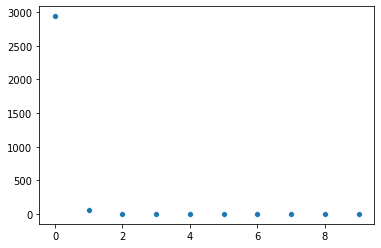

In [72]:
m = len(x) 
numIterations= 10000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations) # [ 0.28623922 46.7549264 ]

## Appendix 3: Speed comparison

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression

In [2]:
x,y,c = make_regression(1000000,2,random_state=1000,coef=True)
c

array([ 1.50608238, 87.99340912])

In [3]:
%%time
ols = linear_model.LinearRegression()
ols.fit(x, y)
print(f'theta_0: {ols.intercept_}')
print(f'theta: {ols.coef_}')

theta_0: 1.6514567491299204e-15
theta: [ 1.50608238 87.99340912]
CPU times: user 243 ms, sys: 12.9 ms, total: 256 ms
Wall time: 68.5 ms


In [ ]:
%%time
gd = linear_model.SGDRegressor(alpha=.0001, max_iter=1000, tol=None
                              )
gd.fit(x,y)
print(f'theta_0: {gd.intercept_[0]}')
print(f'theta_1: {gd.coef_[0]}')

## Resources

[Understanding the Mathematics Behind Gradient Descent](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)
